# WeatherPy
## Melvin Garcia

In [9]:
# Import Dependencies
import matplotlib.pyplot as plt
from citipy import citipy
import requests as req
import pandas as pd
import numpy as np
import seaborn
import random
import apikeys
import json

## Generate Cities List

In [10]:
# Create random set 2000 latitude and longitude values
# The large random size will allow more choices to choose from and prevent .nearest_city 
# from choosing the same city twice

randlon = np.random.uniform(low=-180, high=181, size=2000).tolist()
randlat = np.random.uniform(low=-90, high=91, size=2000).tolist()

In [11]:
# Create list of city names to perform requests on

cities = []

for lat, lon in zip(randlat, randlon):
    city = citipy.nearest_city(lat, lon)
    if city not in cities:
        cities.append(city.city_name)
    else:
        city = citipy.nearest_city(lat, lon)
        cities.append(city.city_name)

In [12]:
# Check that you have at least 500 unique city names to perform requests on
len(set(cities))

754

In [13]:
cities_unique = list(set(cities))

## Perform API Calls

In [14]:
# Loop through the cities list and perform a request for data on each

url = "http://api.openweathermap.org/data/2.5/weather"

params = {'appid': apikeys.OWM_key,
          'q': '',
          'units': 'imperial'}

weather_data = {'City': [],
               'Cloudiness': [],
               'Country': [],
               'Date': [],
               'Humidity': [],
               'Lat': [],
               'Lng':[],
               'Max_Temp':[],
               'Wind Speed':[]}

city_count = 1
city_count_final = 501

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities_unique:
    try:
    # Get weather data
        params['q'] = city
        response = req.get(url, params=params).json()
    # Get weather params for df for at least 500 cities
        if city_count == city_count_final:
            print('-----------------------------')
            print('Data Retrieval Complete')
            print('-----------------------------')
            break
        elif city not in weather_data['City']:  
            # Construct weather_data dictionary
            weather_data['City'].append(response['name'])
            weather_data['Cloudiness'].append(response['clouds']['all'])
            weather_data['Country'].append(response['sys']['country'])
            weather_data['Date'].append(response['dt'])
            weather_data['Humidity'].append(response['main']['humidity'])
            weather_data['Lat'].append(response['coord']['lat'])
            weather_data['Lng'].append(response['coord']['lon'])
            weather_data['Max_Temp'].append(response['main']['temp_max'])
            weather_data['Wind Speed'].append(response['wind']['speed'])
            print(f'Processing Record {city_count} of 500 | {city}')
            print(f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={apikeys.OWM_key}&q={city.replace(" ", "%20")}')
            city_count += 1
        elif city in weather_data['City']:
            continue
    except KeyError:
        print(f'{city} not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 500 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=nhulunbuy
Processing Record 2 of 500 | kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=kattivakkam
Processing Record 3 of 500 | ciudad bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ciudad%20bolivar
Processing Record 4 of 500 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=kavaratti
Processing Record 5 of 500 | ampanihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ampanihy
Processing Record 6 of 500 | zhovti vody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=zhovti%20vody
Processing Re

Processing Record 52 of 500 | santa lucia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=santa%20lucia
Processing Record 53 of 500 | russkiy kameshkir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=russkiy%20kameshkir
Processing Record 54 of 500 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=bethel
Processing Record 55 of 500 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=mehamn
Processing Record 56 of 500 | gashua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=gashua
Processing Record 57 of 500 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=moron
Processing Record 58 of 500 | yulara
http://api.openweathermap.org/data/2.5/weather?

lohkva not found. Skipping...
Processing Record 105 of 500 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=lebu
dianopolis not found. Skipping...
phrai bung not found. Skipping...
Processing Record 106 of 500 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=lompoc
mys shmidta not found. Skipping...
Processing Record 107 of 500 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=nuuk
Processing Record 108 of 500 | calabozo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=calabozo
Processing Record 109 of 500 | finschhafen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=finschhafen
marcona not found. Skipping...
Processing Record 110 of 500 | beringovskiy
http://api.openweathermap.org/data/2.5/weather

Processing Record 157 of 500 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=cap%20malheureux
Processing Record 158 of 500 | shahr-e babak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=shahr-e%20babak
Processing Record 159 of 500 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=khatanga
Processing Record 160 of 500 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vanavara
Processing Record 161 of 500 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=georgetown
Processing Record 162 of 500 | nkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=nkan
Processing Record 163 of 500 | pangody
http://api.openweathermap.o

Processing Record 209 of 500 | maracaibo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=maracaibo
Processing Record 210 of 500 | varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=varhaug
Processing Record 211 of 500 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ulaanbaatar
Processing Record 212 of 500 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vardo
Processing Record 213 of 500 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=lazaro%20cardenas
Processing Record 214 of 500 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=saldanha
araguacu not found. Skipping...
burkhala not found. Skipping...
Processi

Processing Record 261 of 500 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=quelimane
Processing Record 262 of 500 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=pangnirtung
Processing Record 263 of 500 | mizdah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=mizdah
Processing Record 264 of 500 | kovdor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=kovdor
Processing Record 265 of 500 | bloomingdale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=bloomingdale
Processing Record 266 of 500 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=naze
Processing Record 267 of 500 | cidreira
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 313 of 500 | tizimin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=tizimin
Processing Record 314 of 500 | senanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=senanga
Processing Record 315 of 500 | catuday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=catuday
Processing Record 316 of 500 | ca mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ca%20mau
Processing Record 317 of 500 | razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=razole
Processing Record 318 of 500 | the pas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=the%20pas
Processing Record 319 of 500 | kapustin yar
http://api.openweathermap.org/data/2.5/weather?units=Imp

la uribe not found. Skipping...
Processing Record 365 of 500 | libourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=libourne
Processing Record 366 of 500 | jaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=jaciara
Processing Record 367 of 500 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=iqaluit
vaitupu not found. Skipping...
sisian not found. Skipping...
Processing Record 368 of 500 | ningxiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ningxiang
Processing Record 369 of 500 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=san%20vicente
Processing Record 370 of 500 | aloleng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q

Processing Record 416 of 500 | maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=maldonado
Processing Record 417 of 500 | tyumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=tyumen
Processing Record 418 of 500 | kurumkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=kurumkan
Processing Record 419 of 500 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=seoul
Processing Record 420 of 500 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=xining
Processing Record 421 of 500 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=chapais
Processing Record 422 of 500 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 470 of 500 | vohibinany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vohibinany
Processing Record 471 of 500 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=avarua
Processing Record 472 of 500 | myski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=myski
urumqi not found. Skipping...
Processing Record 473 of 500 | kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=kapit
Processing Record 474 of 500 | payakumbuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=payakumbuh
cheuskiny not found. Skipping...
Processing Record 475 of 500 | bima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=bima
amderma not found. Skipping...
Processing

In [15]:
# Create df from weather data
weather_df = pd.DataFrame(weather_data)

# Check that there are at least 500 unique cities obtained from API requests
len(weather_df['City'].unique())

500

In [16]:
# Peek at data
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
0,Nhulunbuy,40,AU,1512345600,59,-12.23,136.77,89.60,4.70
1,Kattivakkam,40,IN,1512343800,88,13.22,80.32,77.00,7.63
2,Ciudad Bolivar,88,VE,1512347501,85,8.12,-63.55,79.47,12.77
3,Kavaratti,68,IN,1512347500,100,10.57,72.64,80.91,22.28
4,Ampanihy,0,MG,1512347504,93,-24.70,44.75,67.95,2.93


## Latitude vs. Temperature Plot

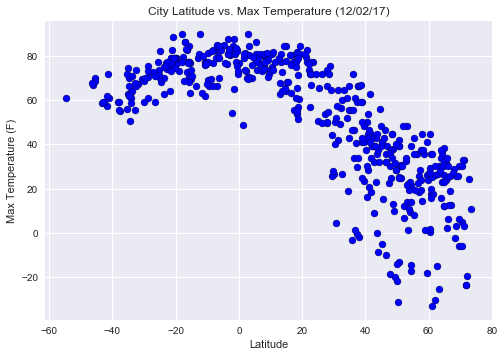

In [17]:
plt.scatter(weather_df['Lat'], weather_df['Max_Temp'],
           marker = 'o', facecolors='blue', 
           edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (12/02/17)')
plt.grid(True)
plt.savefig('CityLatvsMaxTemp.png')
plt.show()

## Latitude vs. Humidity Plot

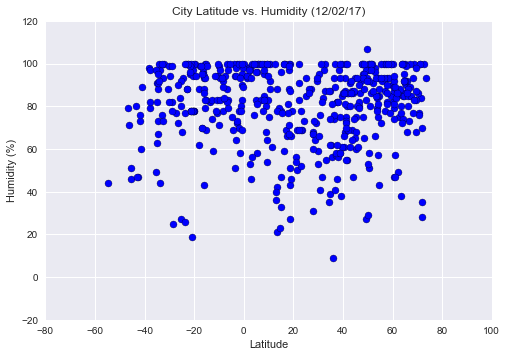

In [18]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'],
           marker = 'o', facecolors='blue', 
           edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (12/02/17)')
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid(True)
plt.savefig('CityLatvsHumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

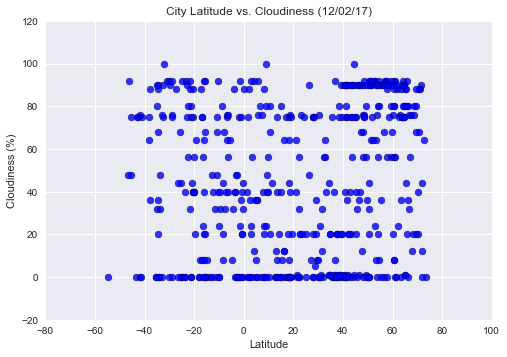

In [19]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],
           marker = 'o', facecolors='blue', 
           edgecolors='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (12/02/17)')
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid(True)
plt.savefig('CityLatvsCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

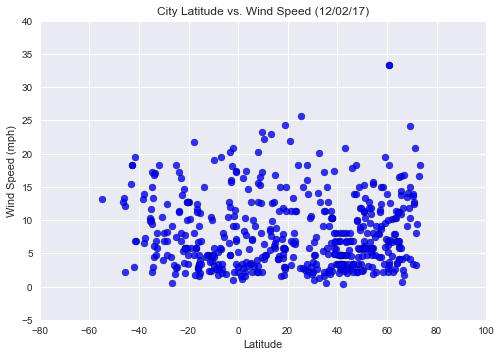

In [20]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],
           marker = 'o', facecolors='blue', 
           edgecolors='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (12/02/17)')
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.grid(True)
plt.savefig('CityLatvsWindSpeed.png')
plt.show()

In [21]:
# Save df as csv
weather_df.to_csv('MG_weather_df.csv', index=False)

## Analysis

### - One of the evident trends is that near latitude 0 (the equator), cities have a higher temperature.
### - Following up on the first point, humidity percentage is highest in between -20 and 0 degrees latitude.
### - Cities towards higher latitudes seem to have higher wind speeds. Especially between 50 and 80 degrees latitude.